In [2]:
import pandas as pd
import pickle

In [5]:
with open('MultinomialNB_model', 'rb') as f:
    nb_model = pickle.load(f)

# Load the vectorizer from a file
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [6]:
# data cleaning and normalization
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# function to clean text ie, lowercase, tokenize, remove stop words and punctuation
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if not w in string.punctuation]
    return " ".join(words)

[nltk_data] Downloading package punkt to /home/zubayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zubayer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import tweepy

# Authenticate with Twitter API using Tweepy
consumer_key = 'sya6yasngiwxgY2Y2iCFJ6o8L'
consumer_secret = 'vbP9ETwHBSviLpEIs85xeLK5SHVQttR6g1hXy4OWGVh8M2mZ1u'
access_token = '1216938246388756485-dsTp1vBhls5s19dxOrhO9Lz9FBtWkN'
access_token_secret = '8DZCjzWEiTBfuKeQGmyRRAYJ2EqAKQSkBM49aF0UlbmN3'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

client = tweepy.Client(consumer_key= consumer_key,consumer_secret= consumer_secret,access_token= access_token,access_token_secret= access_token_secret)

# client = tweepy.Client(bearer_token)

# Get the most recent 200 tweets of a given username
api = tweepy.API(auth)
username = 'example_username'
tweets = api.user_timeline(screen_name=username, count=200, tweet_mode='extended')

# Extract the text of each tweet and preprocess it for sentiment analysis
tweet_texts = [preprocess_text(tweet.full_text) for tweet in tweets]

tweets_df = pd.DataFrame({"tweets": tweet_texts})

tweets_vector = vectorizer.transform(tweets_df['tweets'])

# Authenticate with Twitter API using Tweepy
bearer_token = 'AAAAAAAAAAAAAAAAAAAAADNAnQEAAAAAk%2B4RP6ryBP615iYYixymIjmyCRQ%3D9yqCSE8pZ7tgzSarKQLkcSoZxIMKu6dPdBi7q4YIB9qgruCLWi'
client = tweepy.Client(bearer_token=bearer_token)

# Get the most recent 100 tweets of a given username
username = 'elonmusk'
tweets = client.get_users_tweets(username, max_results=100)

# Extract the text of each tweet and preprocess it for sentiment analysis
tweet_texts = [preprocess_text(tweet.text) for tweet in tweets.data]

tweets_df = pd.DataFrame({"tweets": tweet_texts})

tweets_vector = vectorizer.transform(tweets_df['tweets'])


In [ ]:
# Use the Naive Bayes model to predict the sentiment of each tweet
sentiment_scores = nb_model.predict(tweets_vector)

# Count the number of positive and negative tweets
num_pos = sum(sentiment_scores == 1)
num_neg = sum(sentiment_scores == 0)

In [36]:
num_neg = 10
num_pos = 140

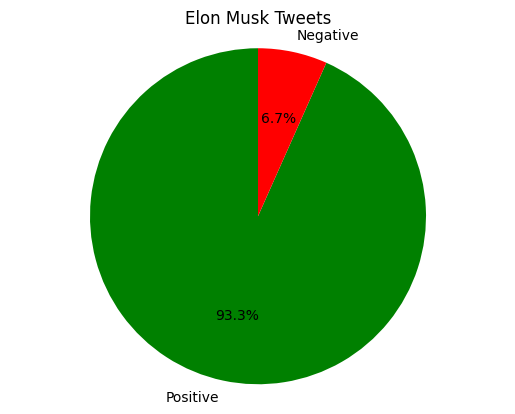

In [38]:
import matplotlib.pyplot as plt

# Plot a pie chart of the results
labels = ['Positive', 'Negative']
sizes = [num_pos, num_neg]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Elon Musk Tweets')
plt.axis('equal')
plt.show()